In [1]:
# 필요한 module import
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import warnings
warnings.filterwarnings(action = "ignore")

ImportError: No module named tensorflow

In [ ]:
## 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 우리가 사용할 데이터파일의 압축파일이 쏙 들어가는 곳 ?

In [ ]:
## 2. Model 정의(Tensorflow graph 생성)
tf.reset_default_graph() # tensorflow graph 초기화
## 2.1 placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)
## 2.2 Convolution
## CNN은 이미지 학습에 최적화된 depp learning 방법
## 입력받은 이미지의 형태가 4차원 매트릭스
## (이미지의 개수, 이미지의 width, 이미지 height, color수)
X_img=tf.reshape(X, [-1,28,28,1])
## 2.3 Convolution
## filter 정의 => filter의 shape()
# filter1 = tf.Variable(tf.random_normal([3,3,1,32]))
# ## filter를 이용해서 Convolution image를 생성
# # 원본이미지화 필터이미지를 행렬곱 연산을해서 컨벌루젼 이미지를 만든다(정확하게는 activation이미지 생성)
# L1 = tf.nn.conv2d(X_img,filter1,strides=[1,1,1,1], padding="SAME")
# ## 만들어진 Convolution에 Relu를 적용
# L1 = tf.nn.relu(L1)
# ## pooloing 작업(reesize, sampling 작업) => optional
# L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME") # kernel 사이즈 가로2 세로2 의미

# 첫번째 컨벌루젼 레이어 ~하고, 렐루하고, 풀링하고 ?
L1 = tf.layers.conv2d(inputs=X_img, filters=3, kernel_size=[3,3], padding="SAME",strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs = L1, pool_size=[2,2], padding="SAME", strides=2) # ksize를 poo_size로 바꿔ㅜ줄거
# 레이어가 많을수록 이미지의 갯수는 많아지지만 크기가 작아지므로 데이터 손실이 일어남 => 적정한 갯수 찾아야함

## Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=6, kernel_size=[3,3], padding="SAME", strides=1, activation=tf.nn.relu)

L2 = tf.layers.max_pooling2d(inputs = L2, pool_size=[2,2], padding="SAME", strides=2) # maxpooling

print(L2.shape)
# (?,7,7,64) # 7x7 짜리가 64개 존재해
## 2.3 Nural Network
## Convolution의 결과(4차원)를
## Neural Network의 입력(2차원)으로 사용하기 위해 shape을 변경
L2 = tf.reshape(L2,[-1,7*7*6])

W1 = tf.get_variable("weight1", shape=[7*7*6, 256], initializer=tf.contrib.layers.xavier_initializer()) # 컬럼의갯수, 아웃풋갯수(임의)
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
_layer1 = tf.nn.relu(tf.matmul(L2,W1) + b1)
layer1 = tf.layers.dropout(_layer1, rate=drop_rate)

# 2번째 레이어
W2 = tf.get_variable("weight2", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer()) # 컬럼의갯수, 아웃풋갯수(임의)
b2 = tf.Variable(tf.random_normal([10]), name="bias2")

## Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.nn.relu(logits)

## cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

## train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(cost)

In [ ]:
# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 진행 (batch처리)

# Accuracy 흑정

In [ ]:
#### 결국 우리 MNIST예제는 입력한 이미지 1개에 대해 예측한 결과가 H의 값으로 도출
#### [0.5, 0.8, 0.99, 0.12, 0.34, ...] 총 10개 # 가장큰 0.99가 몇번째에 있는지 찾자

#### 앙상블은 이런 model이 여러개 있어요!
#### H1 => [0.5, 0.8, 0.99, 0.12, 0.34 ...]
#### H2 => [0.2, 0.3, 0.94, 0.5, 0.1 ...]
#### H3 => [0.7, 0.1, 0.3, 0.2, 0.12 ...]
#### H4 => [0.26, 0.23, 0.194, 0.56, 0.31 ...]

#### SUM => [1.66, 1.43, 2.4, 1.3, 1.2 ...]
#### 최종 prediction은 SUM한 결과값을 가지고 예측

In [69]:
# 기본 MNIST(multinomial classification) 
import tensorflow as tf
import numpy as np
import pandas as pd

# Data Loading
# mnist = input_data.read_data_sets("./data/mnist",one_hot=True)

train_data = pd.read_csv("./data/kaggle/train.csv")
train_x_data = train_data.drop('label', axis = 1)
train_y_data = tf.one_hot(train_data["label"], depth=10).eval(session = tf.Session())
test_x_data = pd.read_csv("./data/kaggle/test.csv")

# Tensorflow Graph Initialization
tf.reset_default_graph()

# Placeholder
X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

#Convolution
x_img = tf.reshape(X, [-1,28,28,1])

# W1 = tf.Variable(tf.random_normal(shape=[2,2,1,6]), name="filter1")
# L1 = tf.nn.conv2d(x_img, W1, strides=[1,2,2,1], padding="SAME")
# L1 = tf.nn.relu(L1)
# L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

L1 = tf.layers.conv2d(inputs=x_img, filters=3, kernel_size=[2,2], padding="SAME",strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs = L1, pool_size=[2,2], padding="SAME", strides=2) # ksize를 poo_size로 바꿔ㅜ줄거

## 2.2.1 Convolution Layer2
# W2 = tf.Variable(tf.random_normal(shape=[3,3,6,12]), name="filter2")
# L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
# L2 = tf.nn.relu(L2)

L2 = tf.layers.conv2d(inputs=L1, filters=3, kernel_size=[2,2], padding="SAME",strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs = L2, pool_size=[2,2], padding="SAME", strides=2)

L2 = tf.reshape(L2, [-1,7*7*3])
W3 = tf.get_variable("weight", shape=[7*7*3,10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal(shape=[10]), name="bias")

# Hypothesis
logits = tf.matmul(L2,W3) + b
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 5 # 니가학습 몇번시킬래
batch_size = 100 # 데이터를 몇등분해서 학습시킬래 # 환경이좋으면 작게 넣어서 한번에 여러번 학습


saver = tf.train.Saver()

# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, drop_rate: 0.3})

    if step %2 == 0:
        print(cost_val)
        

saver.save(sess, './model/practice_model.ckpt', global_step=1000)

# #predict check
predict = tf.argmax(H,1)
# result = sess.run(predict, feed_dict={X:test_x_data, drop_rate: 0.3})
# df = pd.DataFrame({
#     'ImageId': [i for i in range(1,28001)],
#     'Label': result
# })
# df.to_csv('./data/kaggle/submission2.csv', index=False)

# df = pd.DataFrame({
#     'ImageId': [i for i in range(1,28001)],
#     'Label': sess.run(H,feed_dict={X:test_x_data, drop_rate: 0.3})
# })
# df.to_csv('./data/kaggle/ms.csv', index=False)


# accuracy check
correct = tf.equal(predict, tf.math.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data, drop_rate:0.3})))

1.5926214
0.47709733


KeyboardInterrupt: 

(28, 28, 3)
(28, 28)


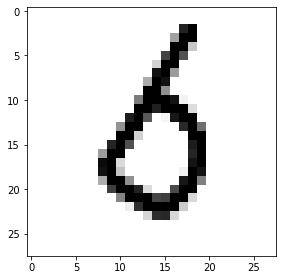

(1, 784)

In [65]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data, io, filters, color

# img2 = io.imread("./data/number2/0.png", as_gray=True) # bmp 넘파이로 드러와서 리싸이즈가 안대유
img = Image.open('./data/number/6.png')
img_test =  img.resize((28,28))
img2 = np.array(img_test)
img3 = color.rgb2gray(img2)

print(img2.shape)
print(img3.shape)

io.imshow(img3)
plt.show()
img3= 1-img3
x_data = img3.reshape(-1,784)
x_data.shape

In [68]:
predict = tf.argmax(H,1)
result=sess.run(predict, feed_dict = {X:x_data, drop_rate:0.3})
result2=sess.run(H, feed_dict = {X:x_data, drop_rate:0.3})

print(result)
print(result2)

[3]
[[ 0.08068627 -0.         -0.          1.277905   -0.          0.69681656
  -0.          0.4087038  -0.         -0.        ]]


In [ ]:
# epoch & batch size
predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3 })
print(result2)
print(result)
training_epoch = 5 # 니가학습 몇번시킬래
batch_size = 100 # 데이터를 몇등분해서 학습시킬래 # 환경이좋으면 작게 넣어서 한번에 여러번 학습

# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, drop_rate: 0.3})

    if step %2 == 0:
        print(cost_val)

In [1]:
## Ensemble MNIST ooo
import tensorflow as tf
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

## Graph init
tf.reset_default_graph()
## Class Define
## cnn model 
class CnnModel:
        # constructor
        def __init__(self,sess,name,m,test):
            self.sess = sess
            self.name = name
            self.mnist = m
            self.test_x_data = test
            self.build_net()
         
        # tensorflow model graph(node) method    
        def build_net(self):    
            with tf.variable_scope(self.name):

                # tensorflow graph init
                self.X = tf.placeholder(shape = [None,784], dtype = tf.float32)
                self.Y = tf.placeholder(shape = [None,10], dtype = tf.float32)
                self.drop_rate = tf.placeholder(dtype = tf.float32)
                X_img = tf.reshape(self.X,[-1,28,28,1])

                L1 = tf.layers.conv2d(inputs=X_img,
                                      filters = 1,
                                      kernel_size=[3,3],
                                      padding= "SAME",
                                      strides=1,
                                      activation=tf.nn.relu)

                L1 = tf.layers.max_pooling2d(inputs= L1,
                                             pool_size=[2,2],
                                             strides = 2,
                                             padding = "SAME")

                L2 = tf.layers.conv2d(inputs=L1,
                                      filters = 1,
                                      kernel_size=[3,3],
                                      padding= "SAME",
                                      strides=1,
                                      activation=tf.nn.relu)

                L2 = tf.layers.max_pooling2d(inputs= L2,
                                             pool_size=[2,2],
                                             strides = 2,
                                             padding = "SAME")

                L2 = tf.reshape(L2, [-1,7*7*1])

                W1 = tf.get_variable("weight1",shape = [7*7*1,32],initializer=tf.contrib.layers.xavier_initializer())
                b1 = tf.Variable(tf.random_normal([32]),name = "bias1")
                _layer1 = tf.nn.relu(tf.matmul(L2,W1)+ b1)
                layer1 = tf.layers.dropout (_layer1, rate = self.drop_rate)

                W2 = tf.get_variable("weight2",shape = [32,10],initializer=tf.contrib.layers.xavier_initializer())
                b2 = tf.Variable(tf.random_normal([10]),name = "bias2")

                self.logits = tf.matmul(layer1,W2)+ b2
                self.H = tf.nn.relu(self.logits)

            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.Y))
            self.optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
            self.train = self.optimizer.minimize(self.cost)
            predict = tf.argmax(self.H,1)
            correct = tf.equal(predict,tf.argmax(self.Y,1))
            self.accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
            
        # model train
        def train_net(self, train_x_data, train_y_data):
            return sess.run([self.train, self.cost],feed_dict = {self.X : batch_x, self.Y: batch_y, self.drop_rate:0.7})
           
        
        # model Accuracy
        def get_accuracy(self,train_x_data, train_y_data):
            self.result = self.sess.run(self.accuracy , feed_dict = {self.X:train_x_data,
                                                       self.Y: train_y_data,
                                                       self.drop_rate:0.7})
            return self.result 
    
        # model의 prediction
        def get_prediction(self,x_data):
            return self.sess.run(self.H,feed_dict={self.X:x_data,self.drop_rate:1.0})
            
## 1.Data loading
mnist= input_data.read_data_sets("./data/mnist", one_hot=True)
train= mnist.train
test_x_data = pd.read_csv("./data/kaggle/test.csv")
# test_x_data = pd.read_csv("./data/digitrecognizer/test.csv")

## 2. Model number
sess = tf.Session()

training_epochs = 1
batch_size = 50
learning_rate = 0.001

num_of_model = 2
cnn_models = [CnnModel(sess,"Model" + str(x),train,test_x_data) for x in range(num_of_model)]

sess.run(tf.global_variables_initializer())

# saver = tf.train.Saver()

global_step = tf.Variable(0, trainable=False, name='global_step')

saver = tf.train.Saver()

ckpt = tf.train.get_checkpoint_state('./model')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

# for m in cnn_models:
#     print(m.name)
#     for step in range(training_epochs):
#         num_of_iter = int(train.num_examples / batch_size)
#         cost_val = 0
#         for i in range(num_of_iter):
#             batch_x, batch_y = train.next_batch(batch_size)
#             _,cost_val = m.train_net(train.images,train.labels)
#     print('Epoch: ', '%04d' %(step + 1), 'Cost = ', cost_val)
#     print(m.get_accuracy(mnist.test.images,mnist.test.labels))
# print('Training Finished')

# saver.save(sess, './model/practice_model.ckpt', global_step=1000)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dropout instead.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
# from PIL import Image
import numpy as np
import sys
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('./check/practice_model.meta')
new_saver.restore(sess, './check/practice_model')
# tf.all_variables()
X = sess.graph.get_tensor_by_name("Model0/Placeholder:0")
logits = sess.graph.get_tensor_by_name("Model0/add_1:0")
train = sess.graph.get_tensor_by_name("Model0/Placeholder_2:0")

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  0.85882353 0.6352

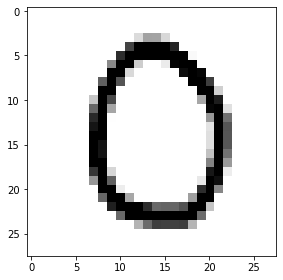

[7 3 6]
[4 3 4]


In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import sys
from tensorflow.examples.tutorials.mnist import input_data
from skimage import data, io, filters, color


# img = Image.open('./data/number/8.png')
# display(img)

# img_test =  img.resize((28,28))
# img = np.array(img_test)
# img_test = color.rgb2gray(img)

# io.imshow(img_test)
# plt.show()

# img_test = img_test.astype(np.float32)
# test_img = img_test.reshape(-1, 784)
# test_img = 1-test_img
# print(test_img.shape)
# display(test_img)




# print(cnn_models.size)

# mnist = input_data.read_data_sets("./data/mnist", one_hot=True) # 우리가 사용할 데이터파일의 압축파일이 쏙 들어가는 곳 ?

# sess = tf.InteractiveSession()
# new_saver = tf.train.import_meta_graph('./practice_model.meta')
# new_saver.restore(sess, './practice_model')

# X = sess.graph.get_tensor_by_name("Model0/Placeholder:0")
# logits = sess.graph.get_tensor_by_name("Model0/add_1:0")
# train = sess.graph.get_tensor_by_name("Model0/Placeholder_2:0")
# accuracy = sess.graph.get_tensor_by_name("Mean_1:0")





# def get_prediction(self,x_data):
#     return self.sess.run(self.H,feed_dict={self.X:x_data,self.drop_rate:0.7})


# img2 = io.imread("./data/number2/0.png", as_gray=True) # bmp 넘파이로 드러와서 리싸이즈가 안대유
img2 = Image.open('./data/number/0.png')
img_test =  img2.resize((28,28))
img2 = np.array(img_test)
img3 = color.rgb2gray(img2)

print(img3)

io.imshow(img2)
plt.show()
# print(img2)
img2= 1-img2
# print(img2)
x_data = img2.reshape(-1,784)

for i in cnn_models:
    result=i.get_prediction(x_data)
    print(sess.run(tf.argmax(result,1)))

    


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.    

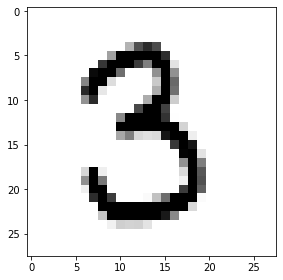

(1, 784)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

[7]
[4]


In [17]:
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

img = Image.open('./data/number/3.png')
display(img)

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)
print(img_test)
io.imshow(img_test)
plt.show()

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img
print(test_img.shape)
display(test_img)



for i in cnn_models:
    result=i.get_prediction(test_img)
    print(sess.run(tf.argmax(result,1)))

    

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
# import sys
# from tensorflow.examples.tutorials.mnist import input_data
from skimage import data, io, filters, color


im = Image.open('./data/number/0.png')

pix = np.array(im)

print(pix-250)

[[[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 ...

 [[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]]
